### Data Description
The dataset is the result of a survey by a bank in which customers get an answer on whether to sign up for a service. Answers were received by calling customers by phone. The answers are 'yes' or 'no'.

#### Dataset Link: https://archive.ics.uci.edu/ml/datasets/bank+marketing

**`Attribute Information:`**

**Input variables:**

`bank client data:`
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

`related with the last contact of the current campaign:`

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

`other attributes:`

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

`social and economic context attributes`

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21. y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
bank=pd.read_csv("bank-additional-full.csv",sep=";")
print(bank.shape)
bank.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
bank["y"].value_counts() / np.float(len(bank))

no     0.887346
yes    0.112654
Name: y, dtype: float64

We need to resolve the imbalance in the "yes", "no" distribution here.

In [8]:
#numeric and categorical data
numeric_cols=bank.select_dtypes(include=['int64','float64']).columns
categ_cols=bank.select_dtypes(include='object').columns

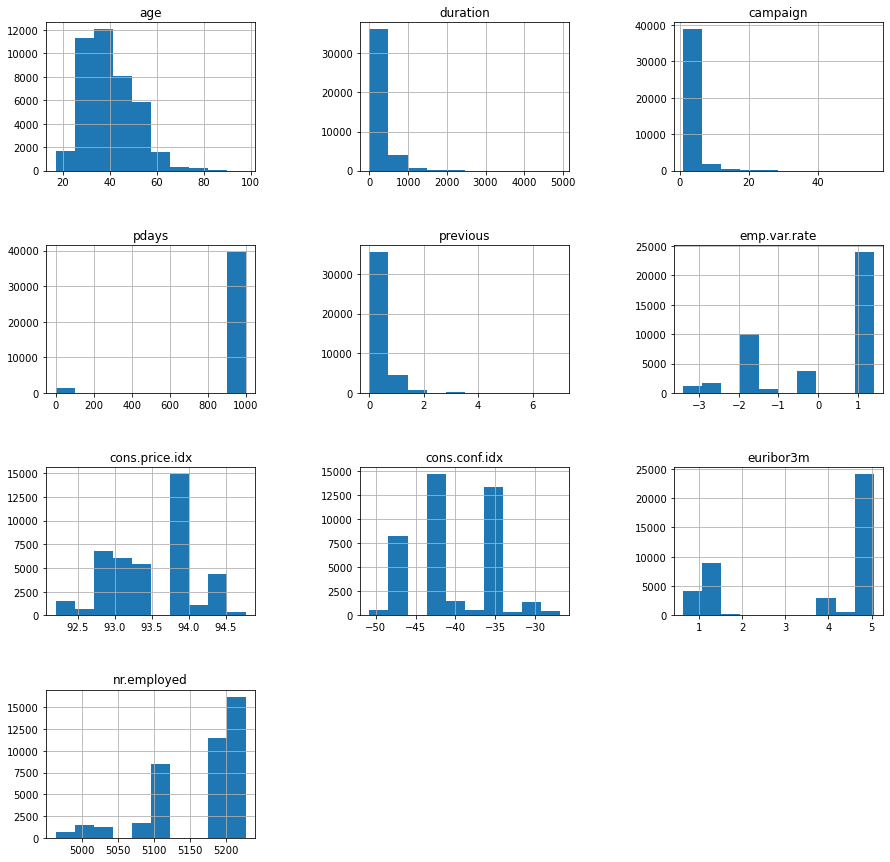

In [9]:
bank.hist(column=numeric_cols,figsize=(15,15))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

### Ordinal variables

In [10]:
bank['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [11]:
bank['poutcome']=bank['poutcome'].map({'failure':-1,'nonexistent':0,'success':1})
bank['poutcome'].value_counts()

 0    35563
-1     4252
 1     1373
Name: poutcome, dtype: int64

In [12]:
bank['default']=bank['default'].map({'yes':-1,'unknown':0,'no':1})
bank['housing']=bank['housing'].map({'yes':-1,'unknown':0,'no':1})
bank['loan']=bank['loan'].map({'yes':-1,'unknown':0,'no':1})

### Nominal variables

In [13]:
categ_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [14]:
nominal=['job','marital','education','contact','month','day_of_week']

In [15]:
# one-hot encoding
bank=pd.get_dummies(bank,columns=nominal)

In [16]:
bank['y']=bank['y'].map({'yes':1,'no':0})
bank.head()

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,1,1,1,261,1,999,0,0,1.1,...,0,1,0,0,0,0,1,0,0,0
1,57,0,1,1,149,1,999,0,0,1.1,...,0,1,0,0,0,0,1,0,0,0
2,37,1,-1,1,226,1,999,0,0,1.1,...,0,1,0,0,0,0,1,0,0,0
3,40,1,1,1,151,1,999,0,0,1.1,...,0,1,0,0,0,0,1,0,0,0
4,56,1,1,-1,307,1,999,0,0,1.1,...,0,1,0,0,0,0,1,0,0,0


In [17]:
x=bank.drop(['y'],axis=1)
y=bank['y']
print(x.shape)
print(y.shape)

(41188, 55)
(41188,)


In [18]:
#train-test split
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

### Scaling

In [20]:
cols=x_train.columns
x_train[numeric_cols]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12556,40,94,2,999,0,1.4,93.918,-42.7,4.960,5228.1
35451,31,116,4,999,0,-1.8,92.893,-46.2,1.244,5099.1
30592,59,13,6,999,1,-1.8,92.893,-46.2,1.354,5099.1
17914,43,94,5,999,0,1.4,93.918,-42.7,4.961,5228.1
3315,39,344,2,999,0,1.1,93.994,-36.4,4.860,5191.0
...,...,...,...,...,...,...,...,...,...,...
6265,58,427,2,999,0,1.1,93.994,-36.4,4.857,5191.0
11284,37,288,1,999,0,1.4,94.465,-41.8,4.961,5228.1
38158,35,194,1,4,1,-3.4,92.431,-26.9,0.754,5017.5
860,40,295,2,999,0,1.1,93.994,-36.4,4.856,5191.0


In [21]:
#StandardScaler for standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [22]:
#type(x_train)
#Data structures change after transform so let's convert back to pandas frame
x_train=pd.DataFrame(x_train,columns=[cols])
x_test=pd.DataFrame(x_test,columns=[cols])

x_train[cols]

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,-0.001669,-1.948567,-0.942068,0.453477,-0.631114,-0.206242,0.194661,-0.350902,0.194918,0.838794,...,-0.117138,-0.704774,-0.3344,-0.133151,-0.118726,-0.484728,1.962290,-0.513339,-0.496346,-0.495871
1,-0.864095,0.512631,1.088424,0.453477,-0.546321,0.513676,0.194661,-0.350902,0.194918,-1.199440,...,-0.117138,1.418894,-0.3344,-0.133151,-0.118726,-0.484728,1.962290,-0.513339,-0.496346,-0.495871
2,1.819007,0.512631,1.088424,0.453477,-0.943306,1.233593,0.194661,1.677559,-2.557994,-1.199440,...,-0.117138,1.418894,-0.3344,-0.133151,-0.118726,-0.484728,1.962290,-0.513339,-0.496346,-0.495871
3,0.285806,0.512631,-0.942068,0.453477,-0.631114,0.873635,0.194661,-0.350902,0.194918,0.838794,...,-0.117138,-0.704774,-0.3344,-0.133151,-0.118726,-0.484728,-0.509609,-0.513339,2.014724,-0.495871
4,-0.097494,-1.948567,1.088424,0.453477,0.332441,-0.206242,0.194661,-0.350902,0.194918,0.647709,...,-0.117138,1.418894,-0.3344,-0.133151,-0.118726,-0.484728,-0.509609,1.948030,-0.496346,-0.495871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,1.723182,-1.948567,1.088424,0.453477,0.652341,-0.206242,0.194661,-0.350902,0.194918,0.647709,...,-0.117138,1.418894,-0.3344,-0.133151,-0.118726,-0.484728,-0.509609,-0.513339,2.014724,-0.495871
32946,-0.289144,0.512631,1.088424,0.453477,0.116604,-0.566200,0.194661,-0.350902,0.194918,0.838794,...,-0.117138,-0.704774,-0.3344,-0.133151,-0.118726,-0.484728,-0.509609,1.948030,-0.496346,-0.495871
32947,-0.480795,0.512631,-0.942068,0.453477,-0.245692,-0.566200,-5.147753,1.677559,2.947829,-2.218556,...,-0.117138,-0.704774,-0.3344,7.510272,-0.118726,-0.484728,-0.509609,1.948030,-0.496346,-0.495871
32948,-0.001669,0.512631,-0.942068,0.453477,0.143584,-0.206242,0.194661,-0.350902,0.194918,0.647709,...,-0.117138,1.418894,-0.3344,-0.133151,-0.118726,-0.484728,-0.509609,-0.513339,-0.496346,2.016654


# Decision Tree Classifier (with Entropy)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

In [24]:
d_tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
d_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [25]:
pred=d_tree.predict(x_test)

In [26]:
print('Accuracy Score: ', accuracy_score(y_true=y_test, y_pred =pred))

Accuracy Score:  0.9004612770089827


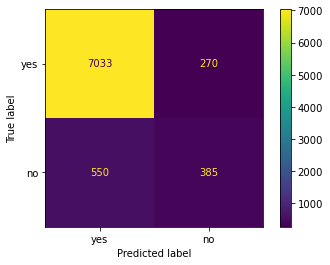

In [27]:
plot_confusion_matrix(d_tree, x_test, y_test, display_labels=["yes","no"])

In [28]:
#control overfitting 
from sklearn.metrics import roc_auc_score

y_pred_train=d_tree.predict(x_train)
y_pred_train_score=roc_auc_score(y_train,y_pred_train)

y_pred_test_score=roc_auc_score(y_test,pred)

print(y_pred_train_score)
print(y_pred_test_score)

0.6940095415228367
0.6873967990592101


## Visualization

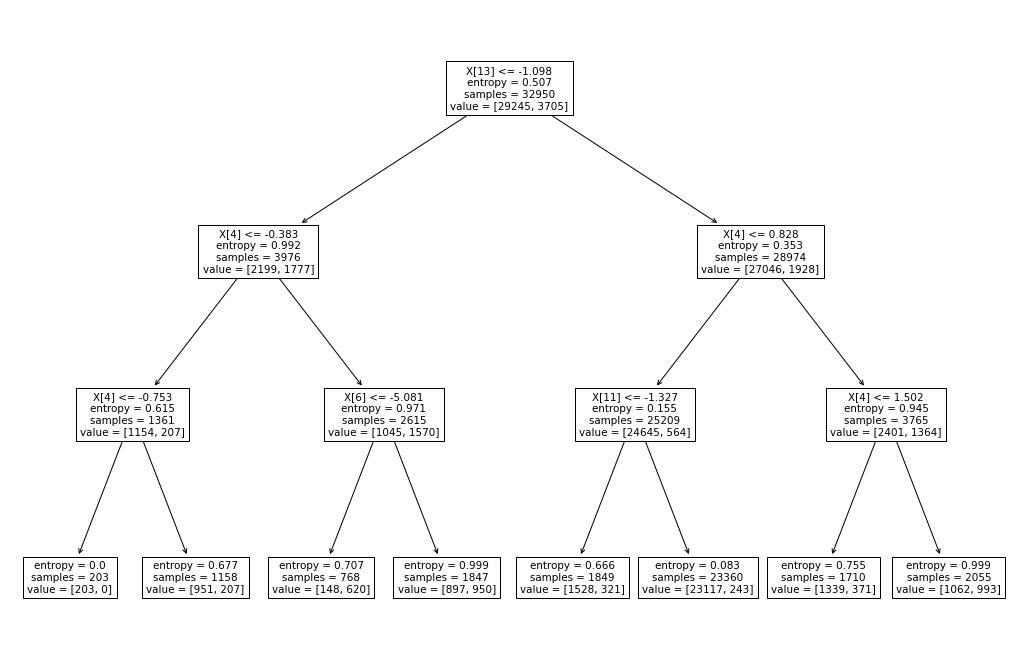

In [29]:
plt.figure(figsize=(18,12))

from sklearn import tree

tree.plot_tree(d_tree.fit(x_train, y_train))
plt.show()

In [30]:
# X[13] root
cols[13]

'nr.employed'